In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import warnings 
import matplotlib.pyplot as plt 
warnings.filterwarnings('ignore')

# Data Analysis

# Dataset Used :- https://www.kaggle.com/datasets/dragonheir/logistic-regression

In [3]:
data = pd.DataFrame(pd.read_csv('D:/Machine_Learning_Collection/Datasets/Social_Network_Ads.csv'))

In [4]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [5]:
data.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

# Preprocessing

In [6]:
x = data.iloc[: , 1:-1].values
y = data.iloc[: , -1:].values

In [7]:
label_encoder = LabelEncoder()
scaler = StandardScaler()

In [8]:
x[: , 0] = label_encoder.fit_transform(x[: , 0])

In [9]:
x[: , -1:] = scaler.fit_transform(x[: , -1:])

# Model Training

In [10]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , shuffle = True)
x_train.shape , x_test.shape , y_train.shape, y_test.shape

((320, 3), (80, 3), (320, 1), (80, 1))

In [11]:
model_with_entropy = DecisionTreeClassifier(criterion = 'entropy')
model_with_gini =  DecisionTreeClassifier(criterion = 'gini')
model_with_log_loss =  DecisionTreeClassifier(criterion = 'log_loss')

In [12]:
model_with_entropy.fit(x_train, y_train)
model_with_gini.fit(x_train, y_train)
model_with_log_loss.fit(x_train, y_train)

DecisionTreeClassifier(criterion='log_loss')

# Testing

In [13]:
output_entropy = model_with_entropy.predict(x_test)
output_gini = model_with_gini.predict(x_test)
output_log_loss = model_with_log_loss.predict(x_test)

In [14]:
accuracy_entropy = accuracy_score(output_entropy , y_test)
accuracy_gini = accuracy_score(output_gini , y_test)
accuracy_log_loss = accuracy_score(output_log_loss , y_test)

In [15]:
print(f"entropy accuracy : {accuracy_entropy:.4f}")
print(f"gini accuracy : {accuracy_gini:.4f}")
print(f"accuracy log loss : {accuracy_log_loss:.4f}")

entropy accuracy : 0.8375
gini accuracy : 0.8250
accuracy log loss : 0.8250


# Tree Visulisation

Can visualize any of tree at once

[Text(0.4638888888888889, 0.9545454545454546, 'x[1] <= 42.5\ngini = 0.441\nsamples = 320\nvalue = [215, 105]'),
 Text(0.23333333333333334, 0.8636363636363636, 'x[2] <= 0.639\ngini = 0.221\nsamples = 229\nvalue = [200, 29]'),
 Text(0.13333333333333333, 0.7727272727272727, 'x[1] <= 41.5\ngini = 0.04\nsamples = 197\nvalue = [193, 4]'),
 Text(0.06666666666666667, 0.6818181818181818, 'x[1] <= 38.5\ngini = 0.021\nsamples = 186\nvalue = [184, 2]'),
 Text(0.044444444444444446, 0.5909090909090909, 'gini = 0.0\nsamples = 155\nvalue = [155, 0]'),
 Text(0.08888888888888889, 0.5909090909090909, 'x[2] <= -0.051\ngini = 0.121\nsamples = 31\nvalue = [29, 2]'),
 Text(0.06666666666666667, 0.5, 'gini = 0.0\nsamples = 18\nvalue = [18, 0]'),
 Text(0.1111111111111111, 0.5, 'x[1] <= 40.5\ngini = 0.26\nsamples = 13\nvalue = [11, 2]'),
 Text(0.08888888888888889, 0.4090909090909091, 'x[2] <= 0.066\ngini = 0.408\nsamples = 7\nvalue = [5, 2]'),
 Text(0.044444444444444446, 0.3181818181818182, 'x[0] <= 0.5\ngini = 

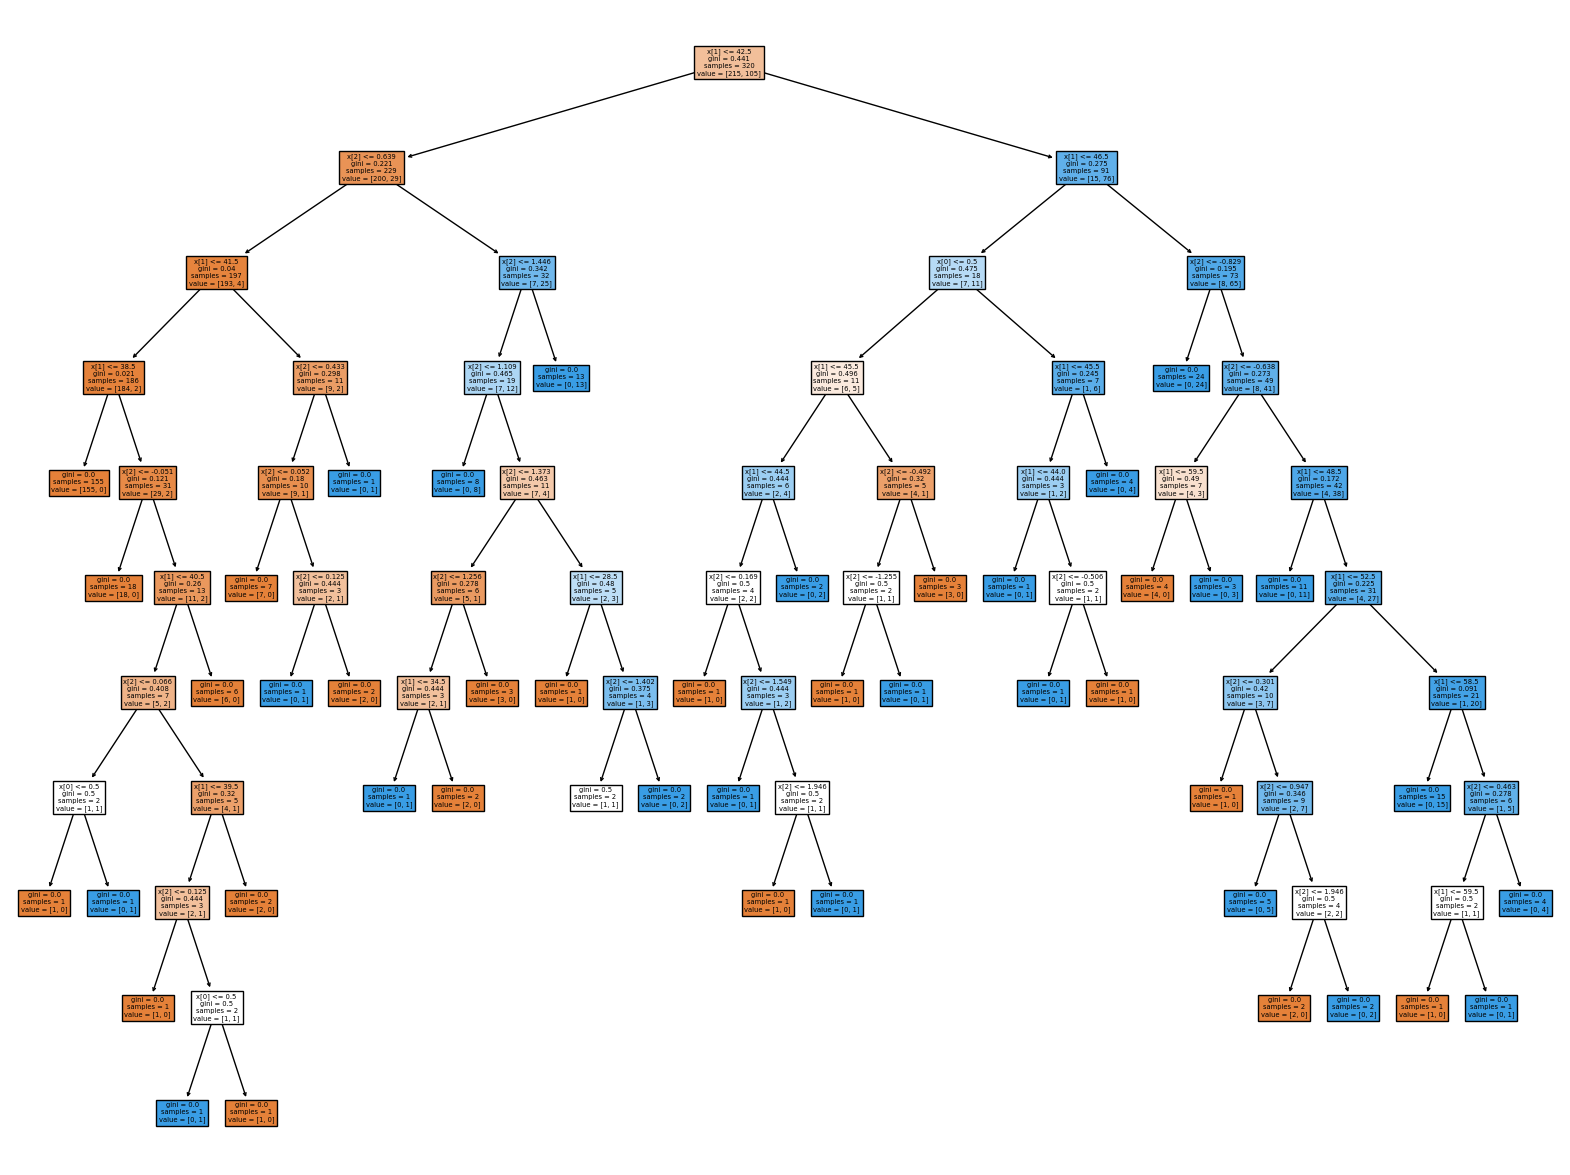

In [23]:
plt.figure(figsize=(20 ,15))
# tree.plot_tree(model_with_entropy , filled = True)
tree.plot_tree(model_with_gini , filled = True)
# tree.plot_tree(model_with_log_loss , filled = True)
